# Import necessary Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import splitfolders
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Download Dataset, Split into Train and Test and Image Augmentation

In [7]:
input_dir='/content/drive/MyDrive/Colab Notebooks/Assignments/Mohnish/Dataset/flowers'

In [15]:
splitfolders.ratio(input_dir,output='/content/drive/MyDrive/Colab Notebooks/Assignments/Mohnish/Dataset',ratio=(.75,0,.25),group_prefix=None)

Copying files: 4303 files [01:27, 49.46 files/s] 


In [11]:
train_datagenerator=ImageDataGenerator(rescale=1./255,zoom_range=0.4,horizontal_flip=True,vertical_flip=False, rotation_range=0.3, brightness_range=(0,0.5))
test_datagenerator=ImageDataGenerator(rescale=1./255)

In [16]:
x_train=train_datagenerator.flow_from_directory(r"/content/drive/MyDrive/Colab Notebooks/Assignments/Mohnish/Dataset/train",target_size=(64,64),class_mode='categorical',batch_size=16)

Found 3226 images belonging to 5 classes.


In [17]:
x_test=test_datagenerator.flow_from_directory(r"/content/drive/MyDrive/Colab Notebooks/Assignments/Mohnish/Dataset/test",target_size=(64,64),class_mode='categorical',batch_size=16)

Found 1077 images belonging to 5 classes.


In [18]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [19]:
x_train.classes

array([0, 0, 0, ..., 4, 4, 4], dtype=int32)

# Create the Model and Adding Layers

In [20]:
model = Sequential()

# Convolutional and Max Pooling Layers
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(64,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(128,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten Layer
model.add(Flatten())

# Dense Layer
model.add(Dense(300,activation='relu'))

#Output Layer
model.add(Dense(5,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)        0

# Compling the Model

In [21]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# Fitting and Training the Model

In [22]:
history = model.fit_generator(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/20
202/202 [==============================] - 31s 104ms/step - loss: 1.3826 - accuracy: 0.3869 - val_loss: 1.7359 - val_accuracy: 0.4104
Epoch 2/20
202/202 [==============================] - 20s 101ms/step - loss: 1.2228 - accuracy: 0.4876 - val_loss: 1.5404 - val_accuracy: 0.5339
Epoch 3/20
202/202 [==============================] - 22s 110ms/step - loss: 1.1477 - accuracy: 0.5307 - val_loss: 1.4229 - val_accuracy: 0.5580
Epoch 4/20
202/202 [==============================] - 20s 101ms/step - loss: 1.0758 - accuracy: 0.5682 - val_loss: 1.2063 - val_accuracy: 0.6295
Epoch 5/20
202/202 [==============================] - 20s 101ms/step - loss: 1.0247 - accuracy: 0.5921 - val_loss: 1.0671 - val_accuracy: 0.6147
Epoch 6/20
202/202 [==============================] - 20s 100ms/step - loss: 0.9948 - accuracy: 0.6082 - val_loss: 1.1301 - val_accuracy: 0.6388
Epoch 7/20
202/202 [==============================] - 20s 101ms/step - loss: 0.9610 - accuracy: 0.6206 - val_loss: 0.9651 - val_ac

In [23]:
model.save('/content/drive/MyDrive/Colab Notebooks/Assignments/Mohnish/Models/flowers.h5')

In [26]:
import matplotlib.pyplot as plt

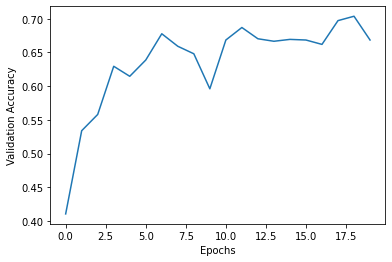

In [30]:
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.plot(history.epoch,history.history['val_accuracy'])

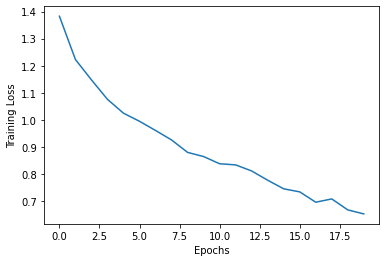

In [33]:
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.plot(history.epoch,history.history['loss'])

# Test the Model

In [37]:
img=image.load_img(r"/content/drive/MyDrive/Colab Notebooks/Assignments/Mohnish/Dataset/test/daisy/10466290366_cc72e33532.jpg",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
x_train.class_indices
index=['daisy','dandellion','rose','sunflower','tulip']
index[y[0]]

'daisy'

In [38]:
img=image.load_img(r"/content/drive/MyDrive/Colab Notebooks/Assignments/Mohnish/Dataset/test/tulip/133692329_c1150ed811_n.jpg",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
x_train.class_indices
index=['daisy','dandellion','rose','sunflower','tulip']
index[y[0]]

'rose'

In [39]:
img=image.load_img(r"/content/drive/MyDrive/Colab Notebooks/Assignments/Mohnish/Dataset/test/sunflower/12282924083_fb80aa17d4_n.jpg",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
x_train.class_indices
index=['daisy','dandellion','rose','sunflower','tulip']
index[y[0]]

'sunflower'

# Assignment 3 completed by Mohnish S (2019504551) on Wednesday, October 5th 2022.